### Umbrella Sampling PMF-Density Graph

In [1]:
# Import dependencies
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import os

In [2]:
# Set the file path to the Excel file containing the stress-strain data.
data_file = r'Z:/UW_Madison_Jiahui/projects/PA_Membrane/mem_jinlong/model/1_NaCl/S2_EquilNVT_3_long_ave_10ns/groups_IOX.xvg'

# Load data from the specified text file into a NumPy array.
data_array = np.loadtxt(data_file, comments=('#', '@'))

# Print the shape of the array.
print("Data shape:", data_array.shape)

Data shape: (50, 2)


In [3]:
# 计算密度的总和
total_density = np.sum(data_array[:, 1])

# 归一化密度
normalized_density = data_array[:, 1] / total_density

# 如果你需要，可以将归一化后的密度与原始坐标一起输出
normalized_data = np.column_stack((data_array[:, 0], normalized_density))

print(normalized_data.shape)
print(normalized_data[ : , 1])

(50, 2)
[4.50786136e-02 4.46126966e-02 4.55736406e-02 4.58357878e-02
 4.38264124e-02 3.98660390e-02 3.92544934e-02 3.71578667e-02
 3.80605908e-02 3.52358999e-02 3.69540182e-02 2.81595785e-02
 1.34245787e-02 4.97961612e-03 9.02739818e-04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 5.82411238e-05 5.53290243e-04
 4.22248128e-03 1.69481451e-02 3.46825743e-02 3.97495990e-02
 3.99825576e-02 3.86138378e-02 3.69540182e-02 3.83517693e-02
 3.91962734e-02 3.82644393e-02 4.14676386e-02 4.39138210e-02
 4.38264124e-02 4.42923294e-02]


In [4]:
# 计算 -ln(密度)
# 需要确保所有的密度值都大于 0
# 可以添加一个小的常数以避免对 0 取对数
negative_log_density = -np.log(normalized_density)

# 如果需要，你可以将结果与原始坐标一起输出
result_data = np.column_stack((data_array[:, 0], negative_log_density))

print(result_data.shape)
print(result_data[ : , 1])

(50, 2)
[3.09934734 3.10973678 3.08842579 3.0826901  3.12751862 3.22223047
 3.23768936 3.29257977 3.26857589 3.34568983 3.29808089 3.56986772
 4.31066802 5.30240247 7.01007618        inf        inf        inf
        inf        inf        inf        inf        inf        inf
        inf        inf        inf        inf        inf        inf
        inf        inf        inf        inf 9.75091886 7.49962784
 5.46733234 4.07759689 3.3615179  3.22515552 3.21931198 3.25414458
 3.29808089 3.26095462 3.2391736  3.26323429 3.18284195 3.12552618
 3.12751862 3.11694377]


C:\Users\jhyan\AppData\Local\Temp\ipykernel_5440\2344594349.py:4: RuntimeWarning: divide by zero encountered in log
  negative_log_density = -np.log(normalized_density)


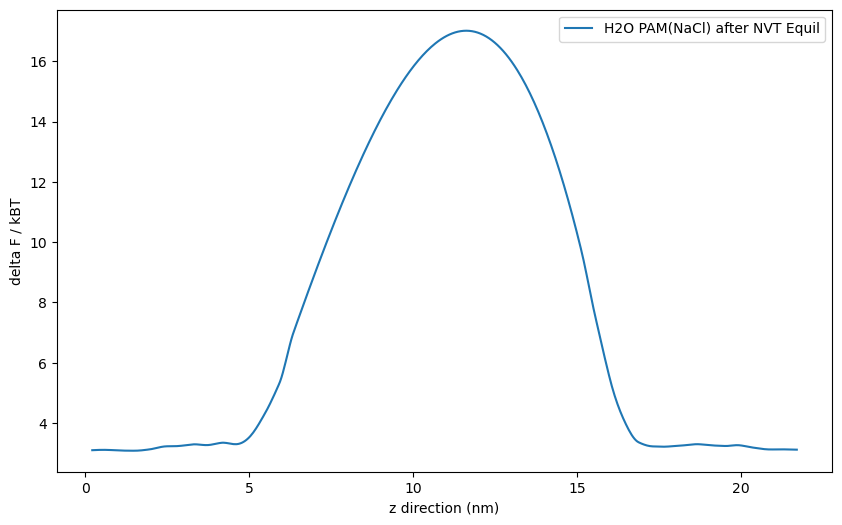

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import Akima1DInterpolator

# 提取 Z 方向的坐标作为 X 轴数据
x = result_data[:, 0]

# 提取归一化密度作为 Y 轴数据
y = result_data[:, 1]

# 移除 y 中的无限大值
finite_indices = np.isfinite(y)
x = x[finite_indices]
y = y[finite_indices]

# 创建 Akima 插值器
akima_interpolator = Akima1DInterpolator(x, y)

# 生成用于绘图的细分点
xnew = np.linspace(x.min(), x.max(), 500)  # 你可以根据需要调整点的数量
ynew = akima_interpolator(xnew)

# 创建一个图形对象，设置大小
plt.figure(figsize=(10, 6))

# 使用 Akima 插值曲线绘制图形
plt.plot(xnew, ynew, label='H2O PAM(NaCl) after NVT Equil')

# 添加 X 轴和 Y 轴的标签
plt.xlabel("z direction (nm)")
plt.ylabel("delta F / kBT")

# 添加图例
plt.legend()

# 显示图表
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


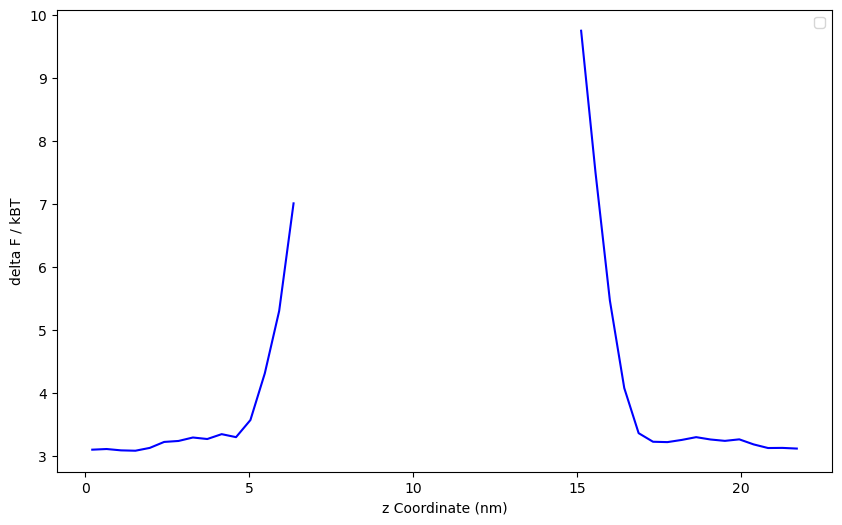

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# 假设 result_data 是你的数据，其中第一列是Z坐标，第二列是归一化密度
# result_data = ...

# 提取 Z 方向的坐标作为 X 轴数据
x = result_data[:, 0]

# 提取归一化密度作为 Y 轴数据
y = result_data[:, 1]

# 移除 y 中的无限大值并获取连续段的索引
finite_indices = np.isfinite(y)
x = x[finite_indices]
y = y[finite_indices]

# 找出所有连续数据段的起始和结束索引
segments = []
start_idx = 0
for i in range(1, len(x)):
    # 如果当前点和前一个点之间断开了
    if not np.isclose(x[i], x[i - 1] + (x[1] - x[0])):
        segments.append((start_idx, i - 1))
        start_idx = i
# 添加最后一个段
segments.append((start_idx, len(x) - 1))

# 创建一个图形对象，设置大小
plt.figure(figsize=(10, 6))

# 绘制每一个连续的数据段，所有线段使用相同的颜色
for start_idx, end_idx in segments:
    plt.plot(x[start_idx:end_idx+1], y[start_idx:end_idx+1], color='blue')  # 指定颜色为蓝色

# 添加 X 轴和 Y 轴的标签
plt.xlabel("z Coordinate (nm)")
plt.ylabel("delta F / kBT")

# 添加图例
plt.legend()

# 显示图表
plt.show()

In [8]:
# Set the file path to the Excel file containing the stress-strain data.
data_file1 = r'Z:/UW_Madison_Jiahui/projects/PA_Membrane/mem_jinlong/model/1_NaCl/S2_EquilNVT_3_long_ave_10ns/groups_IOX.xvg'
data_file2 = r'Z:/UW_Madison_Jiahui/projects/PA_Membrane/mem_jinlong/model/1_NaCl/S2_EquilNVT_3_long_ave_10ns/groups_IOY.xvg'

# Load data from the specified text file into a NumPy array.
data_array1 = np.loadtxt(data_file1, delimiter=None)
data_array2 = np.loadtxt(data_file2, delimiter=None)

# 计算密度的总和
total_density1 = np.sum(data_array1[:, 1])
total_density2 = np.sum(data_array2[:, 1])

# 归一化密度
normalized_density1 = data_array1[:, 1] / total_density1
normalized_density2 = data_array2[:, 1] / total_density2

# 如果你需要，可以将归一化后的密度与原始坐标一起输出
normalized_data1 = np.column_stack((data_array1[:, 0], normalized_density1))
normalized_data2 = np.column_stack((data_array2[:, 0], normalized_density2))

# 计算 -ln(密度)
# 需要确保所有的密度值都大于 0
# 可以添加一个小的常数以避免对 0 取对数
negative_log_density1 = -np.log(normalized_density1)
negative_log_density2 = -np.log(normalized_density2)

# 如果需要，你可以将结果与原始坐标一起输出
result_data1 = np.column_stack((data_array1[:, 0], negative_log_density1))
result_data2 = np.column_stack((data_array2[:, 0], negative_log_density2))


C:\Users\jhyan\AppData\Local\Temp\ipykernel_5440\3150175128.py:24: RuntimeWarning: divide by zero encountered in log
  negative_log_density1 = -np.log(normalized_density1)
C:\Users\jhyan\AppData\Local\Temp\ipykernel_5440\3150175128.py:25: RuntimeWarning: divide by zero encountered in log
  negative_log_density2 = -np.log(normalized_density2)


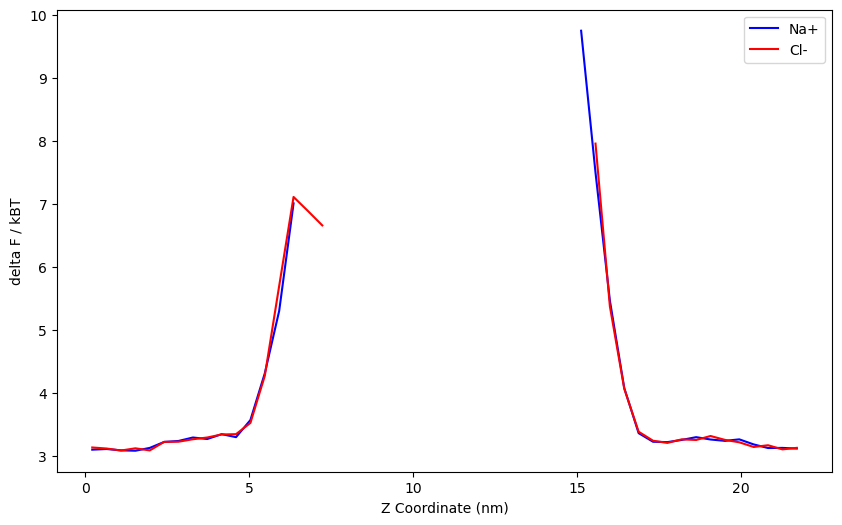

In [9]:
# 假设 result_data1 和 result_data2 是您的两组数据
# 以下是如何处理两组数据的示例代码

def process_and_plot_data(result_data, color, label):
    # 提取 Z 方向的坐标作为 X 轴数据
    x = result_data[:, 0]
    # 提取归一化密度作为 Y 轴数据
    y = result_data[:, 1]
    # 移除 y 中的无限大值
    finite_indices = np.isfinite(y)
    x = x[finite_indices]
    y = y[finite_indices]
    
    # 绘制连续的数据段
    start_idx = 0  # 连续段的起始索引
    for i in range(1, len(x)):
        # 如果当前点和前一个点之间断开了
        if not np.isclose(x[i], x[i - 1] + (x[1] - x[0])):
            # 绘制前一个连续段
            plt.plot(x[start_idx:i], y[start_idx:i], color=color, label=label if start_idx == 0 else "")
            start_idx = i
    # 绘制最后一个连续段
    plt.plot(x[start_idx:], y[start_idx:], color=color, label=label if start_idx == 0 else "")

# 创建一个图形对象，设置大小
plt.figure(figsize=(10, 6))

# 处理和绘制第一组数据
process_and_plot_data(result_data1, 'blue', 'Na+')

# 处理和绘制第二组数据
process_and_plot_data(result_data2, 'red', 'Cl-')

# 添加 X 轴和 Y 轴的标签
plt.xlabel("Z Coordinate (nm)")
plt.ylabel("delta F / kBT")

# 添加图例
plt.legend()

# 显示图表
plt.show()

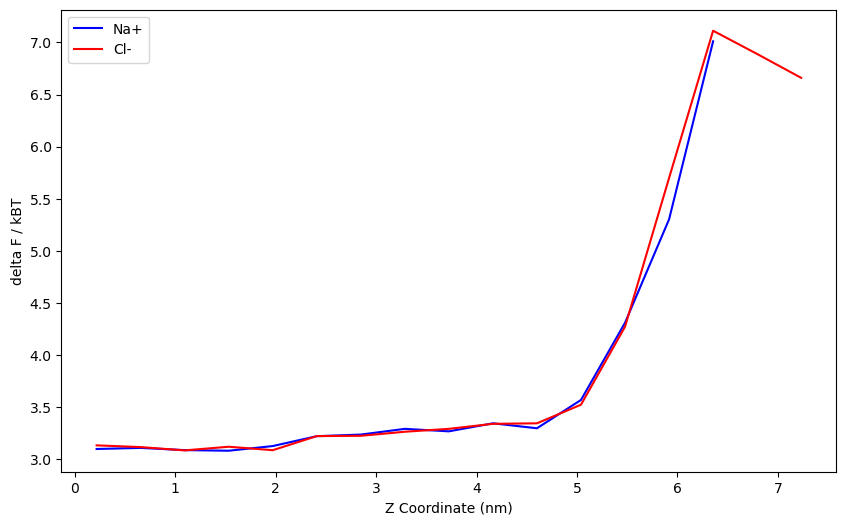

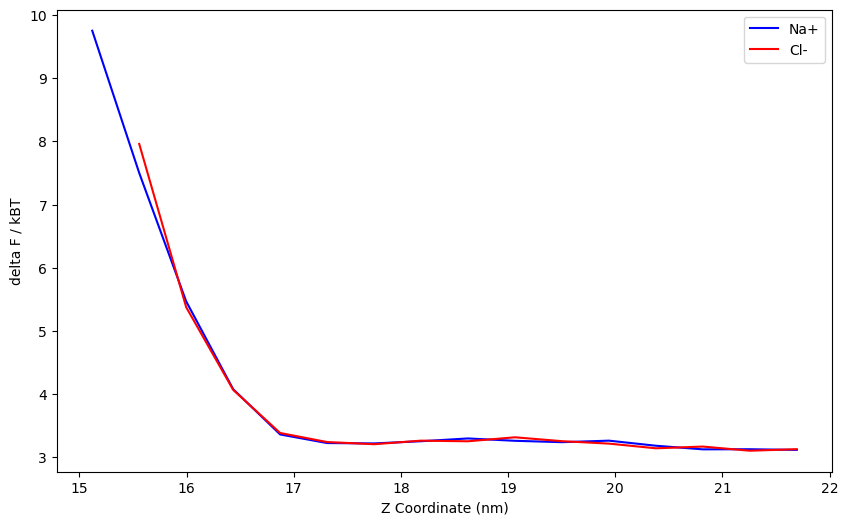

In [10]:
# 假设 result_data1 和 result_data2 是您的两组数据
# result_data1 = ...
# result_data2 = ...

# 定义一个函数来绘制左侧或右侧数据的图表
def plot_side_data(result_data1, result_data2, side):
    plt.figure(figsize=(10, 6))
    
    for result_data, color, label in zip([result_data1, result_data2], ['blue', 'red'], ['Na+', 'Cl-']):
        # 提取 Z 方向的坐标作为 X 轴数据
        x = result_data[:, 0]
        # 提取归一化密度作为 Y 轴数据
        y = result_data[:, 1]
        # 移除 y 中的无限大值
        finite_indices = np.isfinite(y)
        x = x[finite_indices]
        y = y[finite_indices]

        # 选择左侧还是右侧的数据
        if side == 'left':
            side_data = x < 10
        else:
            side_data = x >= 10
        x = x[side_data]
        y = y[side_data]
        
        # 绘制每个数据集的线
        plt.plot(x, y, color=color, label=label)
    
    # 设置图表标题和标签
    plt.xlabel("Z Coordinate (nm)")
    plt.ylabel("delta F / kBT")
    plt.legend()
    #plt.title(f"Data on {side} side")
    plt.show()

# 绘制左侧数据的图表
plot_side_data(result_data1, result_data2, 'left')

# 绘制右侧数据的图表
plot_side_data(result_data1, result_data2, 'right')